In [252]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [253]:
df=pd.read_csv('iris.csv')


# EDA

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [255]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [256]:
df.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [257]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [258]:
df.shape

(150, 5)

there are 150 rows and 5 columns in the dataset

In [259]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class             int32
dtype: object

In [260]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

There are no null values in the dataset

In [261]:
df['class'].unique()

array([0, 1, 2])

There are three unique values in class column

In [262]:
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

There is no class imbalance in the iris dataset

<AxesSubplot:xlabel='class', ylabel='count'>

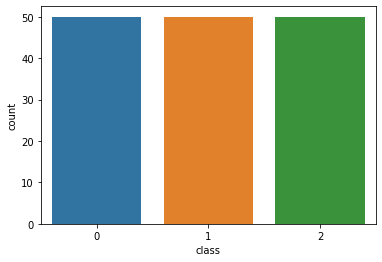

In [263]:
sb.countplot(df['class'])

All three classes are equally distributed

In [264]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

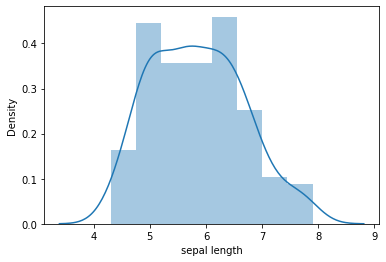

In [265]:
sb.distplot(df['sepal length'])

Data is normally distributed in sepal length

<AxesSubplot:xlabel='sepal width', ylabel='Density'>

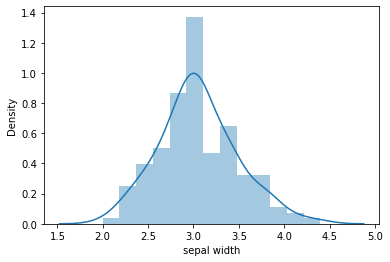

In [266]:
sb.distplot(df['sepal width'])


Data is normally distributed in sepal width too

<AxesSubplot:xlabel='petal length', ylabel='Density'>

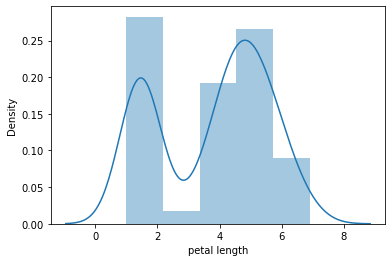

In [267]:
sb.distplot(df['petal length'])

Its not clear 

<AxesSubplot:xlabel='petal width', ylabel='Density'>

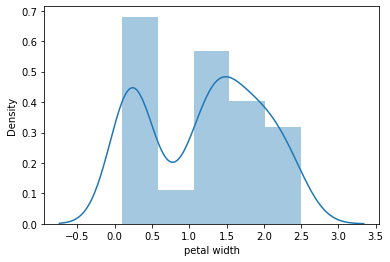

In [268]:
sb.distplot(df['petal width'])

its not clear

<AxesSubplot:>

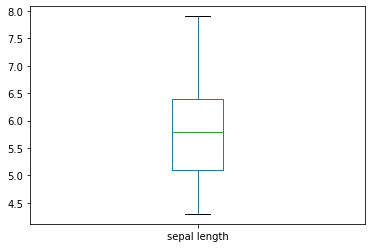

In [269]:
df['sepal length'].plot.box()

no outliers present

<AxesSubplot:>

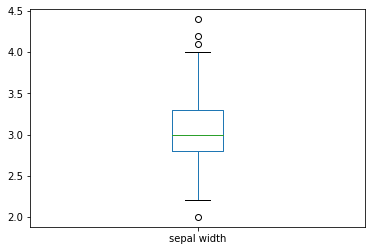

In [270]:
df['sepal width'].plot.box()

OUTLIERS PRESENT

<AxesSubplot:>

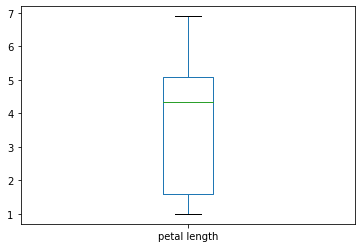

In [271]:
df['petal length'].plot.box()

no outliers present

<AxesSubplot:>

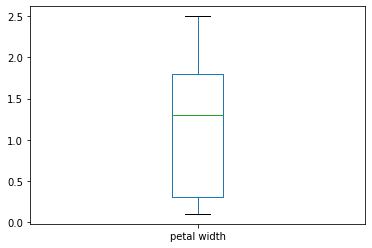

In [272]:
df['petal width'].plot.box()

no outliers present

# BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'comparison between sepal length and sepal width'}, xlabel='sepal length', ylabel='sepal width'>

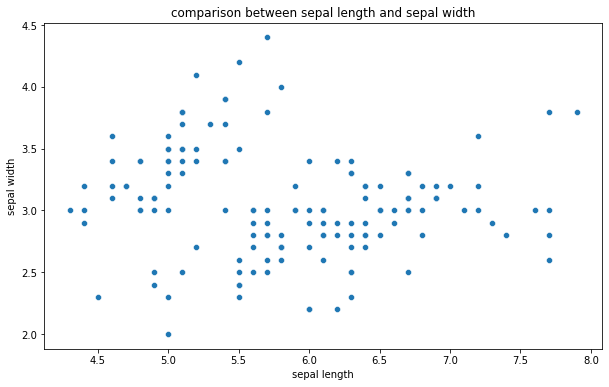

In [273]:
plt.figure(figsize=[10,6])
plt.title('comparison between sepal length and sepal width')
sb.scatterplot(df['sepal length'],(df['sepal width']))

<AxesSubplot:title={'center':'comparison between petal length nd petal width'}, xlabel='petal length', ylabel='petal width'>

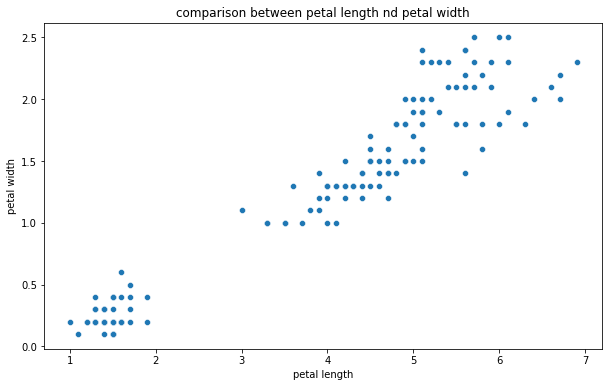

In [274]:
plt.figure(figsize=[10,6])
plt.title('comparison between petal length nd petal width')
sb.scatterplot(df['petal length'],(df['petal width']))


# multivariate analysis

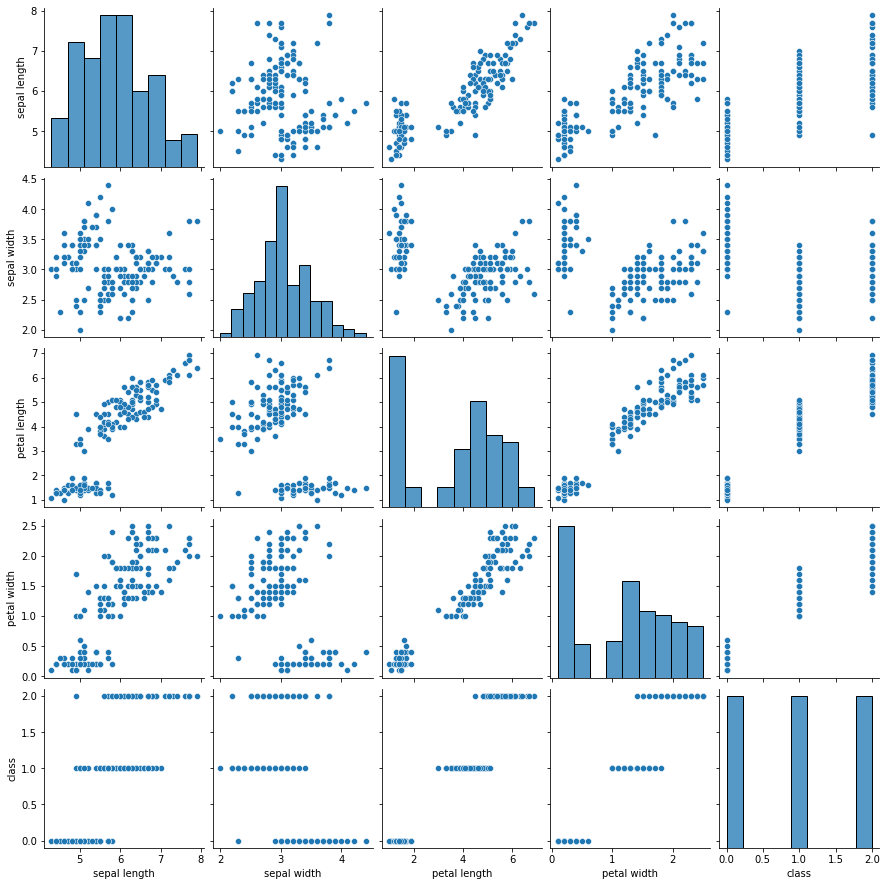

In [275]:
sb.pairplot(df)

In [276]:
cor=df.corr()
cor

,sepal length,sepal width,petal length,petal width,class
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

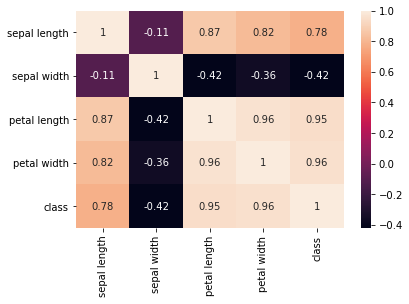

In [277]:
sb.heatmap(cor,annot=True)

petal length,petal width and sepal lenth is highly correlated to the target column

# outlier removal

In [278]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [279]:
new_df.shape

(149, 5)

In [280]:
df.shape

(150, 5)

In [281]:
#loss of data
(1/150*100)


0.6666666666666667

since the dataloss is less than 10 percent its ok to remove outlier,in case of huge dataloss we cannot remove outliers

# skewness

In [282]:
new_df.skew()

sepal length    0.310490
sepal width     0.209284
petal length   -0.289895
petal width    -0.119333
class          -0.012434
dtype: float64

if skewness is -0.5 or 0.5 then skewness is there....in present case there is no skewness in any column

In [283]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [284]:
x.shape

(149, 4)

In [285]:
y.shape

(149,)

# importing required libraries

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# choosing best random state for model building

In [287]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=accuracy_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)
    
    


1.0
6


best random state is 6

In [288]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=6)

In [322]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))


0.9333333333333333


In [323]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))


1.0


In [325]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))


0.9777777777777777


In [292]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))

1.0


# check the cross val score of all four model

In [317]:
from sklearn.model_selection import cross_val_score

In [318]:
print (cross_val_score(dtc,x,y,cv=5).mean())

0.9600000000000002


In [319]:
print (cross_val_score(svc,x,y,cv=5).mean())

0.9666666666666666


In [320]:
print (cross_val_score(rfc,x,y,cv=5).mean())

0.9533333333333334


In [321]:
print (cross_val_score(lg,x,y,cv=5).mean())

0.9733333333333334


the difference between crossval score and accuracy_score is least in SVC so we will go with SVC

best model is SVC

# hyperparameter tuning

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
parameter={'kernel':['rbf','poly','linear']}
svc=SVC()
gd=GridSearchCV(svc,parameter,cv=5)

In [300]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['rbf', 'poly', 'linear']})

In [301]:
gd.best_params_

{'kernel': 'rbf'}

# Final model with appropriate parameters

In [302]:
Final_model=SVC(kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# saving model

In [303]:
import joblib
import pickle

In [304]:
joblib.dump(Final_model,'finalmodel.pkl')

['finalmodel.pkl']